# ICMarkets demo 

showing analysis of different bots being used on the account, to evaluate performace

In [20]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [2]:
mt5.initialize()

True

showing all the data calling the history deals get function for mt5

In [10]:
mt5.history_deals_get(datetime(2024,1,1),datetime.now(), symbol ="XAUUSD")

(TradeDeal(ticket=459138419, order=615843246, time=1711402008, time_msc=1711402008519, type=0, entry=0, magic=261200, position_id=615843246, reason=3, volume=0.1, price=2174.26, commission=0.0, swap=0.0, profit=0.0, fee=0.0, symbol='XAUUSD', comment='my_first_strat', external_id=''),
 TradeDeal(ticket=459139860, order=615844867, time=1711402239, time_msc=1711402239496, type=1, entry=1, magic=261200, position_id=615843246, reason=4, volume=0.1, price=2174.02, commission=0.0, swap=0.0, profit=-2.4, fee=0.0, symbol='XAUUSD', comment='[sl 2174.06]', external_id=''),
 TradeDeal(ticket=459140459, order=615845537, time=1711402345, time_msc=1711402345144, type=0, entry=0, magic=261200, position_id=615845537, reason=3, volume=0.1, price=2173.86, commission=0.0, swap=0.0, profit=0.0, fee=0.0, symbol='XAUUSD', comment='my_first_strat', external_id=''),
 TradeDeal(ticket=459157882, order=615865241, time=1711404602, time_msc=1711404602914, type=1, entry=1, magic=261200, position_id=615845537, reaso

Turning the data into a pandas dataframe so it can be analysed

In [40]:
martingale_xau_data = mt5.history_deals_get(datetime(2024,4,1),datetime.now(), symbol ="XAUUSD")
martingale_xau = {
    'time': [datetime.fromtimestamp(deal.time) for deal in martingale_xau_data],
    'ticket': [deal.ticket for deal in martingale_xau_data],
    'profit': [deal.profit for deal in martingale_xau_data],
    'swap': [deal.swap for deal in martingale_xau_data],
    'volume': [deal.volume for deal in martingale_xau_data],
    'symbol': [deal.symbol for deal in martingale_xau_data]
}
martingale_xau = pd.DataFrame(martingale_xau)
martingale_xau = martingale_xau[martingale_xau['profit'] != 0]
martingale_xau

,time,ticket,profit,swap,volume,symbol
1,2024-04-01 16:06:13,462539059,50.20,0.00,0.10,XAUUSD
3,2024-04-02 02:26:24,462972239,52.30,-3.28,0.10,XAUUSD
5,2024-04-02 17:12:00,463453556,-19.80,0.00,0.10,XAUUSD
7,2024-04-02 17:30:04,463476190,-21.00,0.00,0.10,XAUUSD
9,2024-04-02 17:36:51,463488694,-20.60,0.00,0.10,XAUUSD
11,2024-04-02 20:31:44,463706378,-20.30,0.00,0.10,XAUUSD
13,2024-04-02 22:06:00,463762481,51.00,0.00,0.10,XAUUSD
15,2024-04-03 11:28:30,464131635,52.40,0.00,0.10,XAUUSD
17,2024-04-03 18:28:55,464499467,-19.90,0.00,0.10,XAUUSD
19,2024-04-04 11:17:02,465001602,66.95,0.00,0.13,XAUUSD


Creating equity curve 

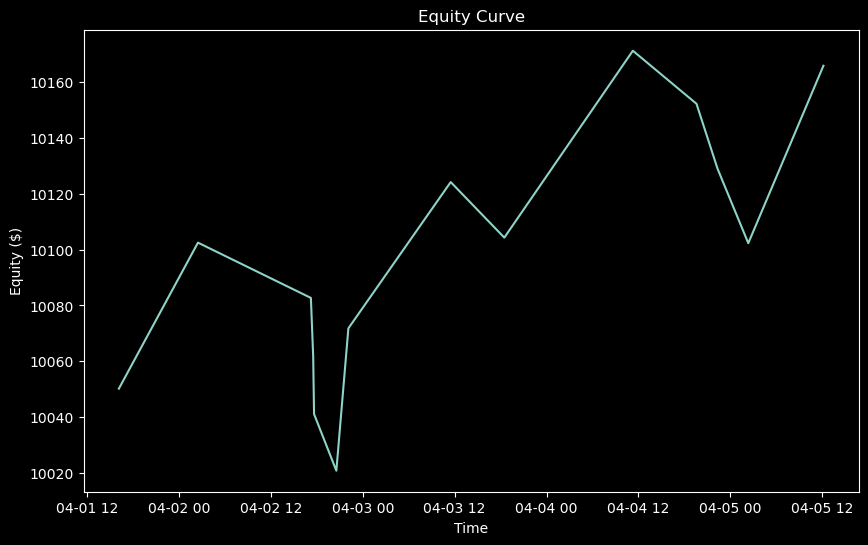

In [41]:
initial_balance = 10000
equity = np.cumsum(martingale_xau['profit']) + initial_balance

plt.figure(figsize=(10, 6))
plt.plot(martingale_xau['time'], equity)
plt.xlabel('Time')
plt.ylabel('Equity ($)')
plt.title('Equity Curve')
plt.grid(False)
plt.show()